# WHEN PEOPLE WANT TO READ A GOOD BOOK..

## Part 1 
### We start with installing and importing all the necessary libraries.

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import matplotlib.pyplot as plt # plotting library
%matplotlib inline 

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 

from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

from IPython.display import Image 
from IPython.core.display import HTML 
    
from pandas.io.json import json_normalize

import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


### Since we require Foursquare queries, we'll store Foursquare credentials and all the necessary inputs.

In [28]:
#CLIENT_ID =  # my Foursquare ID
#CLIENT_SECRET =  # my Foursquare Secret
VERSION = '20180604'
LIMIT = 100
#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)
address = 'Pune, Maharashtra, India'
latitude = 18.5167179107666
longitude = 73.85440063476562

In [3]:
radius = 5000

## Part 2
### We'll define a function to retrieve the necessary columns from the query results.

In [4]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### For Bookstore

In [5]:
search_query = 'Book'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
venues = results['response']['venues']
dataframe = json_normalize(venues)
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

In [6]:
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dataframe_filtered = dataframe_filtered[dataframe_filtered['categories']=='Bookstore']
data_bookstore = dataframe_filtered

#### For Libraries

In [7]:
search_query = 'Library'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
venues = results['response']['venues']
dataframe = json_normalize(venues)
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

In [8]:
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dataframe_filtered = dataframe_filtered[dataframe_filtered['categories']=='Library']
data_library = dataframe_filtered

#### For Colleges

In [9]:
search_query = 'College'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
venues = results['response']['venues']
dataframe = json_normalize(venues)
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

In [10]:
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
data_college = dataframe_filtered

In [11]:
data_college.categories.value_counts()

College Science Building           7
College Engineering Building       6
General College & University       5
College Administrative Building    4
College Academic Building          4
Law School                         3
College Arts Building              3
College Library                    2
Road                               2
College Soccer Field               1
College Cafeteria                  1
University                         1
College & University               1
Playground                         1
College Technology Building        1
College Cricket Pitch              1
Medical School                     1
Fast Food Restaurant               1
College Classroom                  1
Post Office                        1
School                             1
Name: categories, dtype: int64

In [12]:
lst = ['Road','Fast Food Restaurant','Post Office','Playground','College Library',
       'College Soccer Field','College Cricket Pitch','None']

for item in lst:
    data_college = data_college[data_college['categories'] != item]

#### For Institutes

In [13]:
search_query = 'Institute'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
venues = results['response']['venues']
dataframe = json_normalize(venues)
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

In [14]:
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
data_institute = dataframe_filtered

In [15]:
data_institute.categories.value_counts()

College Academic Building          10
College Administrative Building     5
General College & University        4
Office                              3
College Classroom                   3
Student Center                      2
University                          2
Eye Doctor                          2
College Library                     2
College Technology Building         2
Hospital                            2
Coworking Space                     1
College Rec Center                  1
Music Venue                         1
Library                             1
College Science Building            1
Design Studio                       1
Medical School                      1
Art Gallery                         1
Other Nightlife                     1
School                              1
Tech Startup                        1
Name: categories, dtype: int64

In [16]:
lst = ['Eye Doctor','Hospital','Office','Tech Startup','College Library','Library',
      'Coworking Space','Other Nightlife','Art Gallery',]

for item in lst:
    data_institute = data_institute[data_institute['categories'] != item]

#### Following function will ensure that the Name entries in dataframes for colleges and institutes are unique.

In [17]:
count = 0
for i in range(data_college.shape[0]):
    for j in range(data_institute.shape[0]):
        if data_college.iloc[i,0] == data_institute.iloc[j,0] : count = count + 1

count

0

#### Variable count has value 0 at the end, the entries are unique. We'll now concat the dataframes.

In [18]:
frames = [data_bookstore, data_library, data_college, data_institute]
nd = pd.concat(frames)
nd.shape

(117, 15)

## Part 3
### Now, let us carry out K Means clustering. The columns Latitude and Longitude will be used for clustering. 

#### The cluster number with minimum Sum of Squares of Errors (SSE) will be chosen, but it is also important to keep the number as small as possible,otherwise, overfitting will be expected. 
#### Thus, using Elbow point in SSE plot is a good idea. It will make sure that SSE is less and increasing the cluster number will not add much of information to the analysis.
#### Using a loop, we'll calculate the SSEs for each cluster and decide.

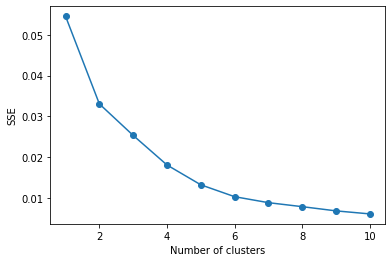

In [19]:
df = nd[['lat','lng']]
X = df.values[:,:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)

sses = []

for i in range(1,11):
    k_means = KMeans(init="k-means++", n_clusters=i, max_iter=300, random_state = 1001)
    k_means.fit(cluster_dataset)
    k_means.fit(X)
    sses.append(k_means.inertia_)
    
plt.plot(range(1, 11), sses, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

#### After 6, the SSEs do not decrease with much difference, hence we'll consider optimal cluster number to be 6 and fit the model.

In [20]:
ncl = 6 #Elbow
k_means = KMeans(init="k-means++", n_clusters= ncl, max_iter=300, random_state = 100)
k_means.fit(cluster_dataset)
k_means.fit(X)
labels = k_means.labels_
df = nd[['name','categories','distance','lat','lng']]
df['Labels'] = labels
m_dist = df.groupby('Labels').mean()

C:\Users\deshpande\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


#### Now, we'll define a function to compute mean distance of each cluster member with its center.

In [21]:
def k_mean_distance(data, cx, cy, i_centroid, cluster_labels):
        distances = [np.sqrt((x-cx)**2+(y-cy)**2) for (x, y) in data[cluster_labels == i_centroid]]
        return distances
clusters=k_means.fit_predict(X)

centroids = k_means.cluster_centers_
distances = []
for i, (cx, cy) in enumerate(centroids):
    mean_distance = k_mean_distance(X, cx, cy, i, clusters)
    means = sum(mean_distance)/len(mean_distance)
    distances.append(means)

#### We need to differentiate the clusters for representation as follows,

In [22]:
cl1 = df[df.Labels==0]
cl2 = df[df.Labels==1]
cl3 = df[df.Labels==2]
cl4 = df[df.Labels==3]
cl5 = df[df.Labels==4]
cl6 = df[df.Labels==5]

#### We'll create a dataframe to display information about all the clusters, this will make the interpretation easy.

In [23]:
clst = [0,1,2,3,4,5]
clst_col = ['blue','crimson','black','orange','green','red']
n_lib = [] ; n_bs = [] ; n_memb = []

In [24]:
n_lib.append(len(cl1[cl1['categories'] == 'Bookstore']))
n_bs.append(len(cl1[cl1['categories'] == 'Library']))
n_memb.append(cl1.shape[0])

n_lib.append(len(cl2[cl2['categories'] == 'Bookstore']))
n_bs.append(len(cl2[cl2['categories'] == 'Library']))
n_memb.append(cl2.shape[0])

n_lib.append(len(cl3[cl3['categories'] == 'Bookstore']))
n_bs.append(len(cl3[cl3['categories'] == 'Library']))
n_memb.append(cl3.shape[0])

n_lib.append(len(cl4[cl4['categories'] == 'Bookstore']))
n_bs.append(len(cl4[cl4['categories'] == 'Library']))
n_memb.append(cl4.shape[0])

n_lib.append(len(cl5[cl5['categories'] == 'Bookstore']))
n_bs.append(len(cl5[cl5['categories'] == 'Library']))
n_memb.append(cl5.shape[0])

n_lib.append(len(cl6[cl6['categories'] == 'Bookstore']))
n_bs.append(len(cl6[cl6['categories'] == 'Library']))
n_memb.append(cl6.shape[0])

dictionary = {'Cluster No.' : clst , 'No. of members' :  n_memb , 'Cluster colour' : clst_col ,
              'No. of Libraries' : n_lib , 'No. of Bookstores' : n_bs ,
             'No. of Colleges/Institutes' : [a - b - c for a, b, c in zip(n_memb , n_lib , n_bs)] ,
             'Average distance from cluster centroid' : distances,
             "Average of variable 'distance'" : m_dist['distance'].to_list()}

repres = pd.DataFrame(dictionary)
repres.set_index('Cluster No.', inplace = True)

## Part 4
### Using Folium map we'll overlay our clusters on map of Pune city.

In [25]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) 

folium.features.CircleMarker(
    [latitude, longitude],
    radius=1,
    color='pink',
    popup='pune',
    fill = True,
    fill_color = 'pink',
    fill_opacity = 0.6
).add_to(venues_map)

for lat, lng in zip(cl1.lat, cl1.lng):
    folium.features.CircleMarker(
        [lat, lng],radius=2,color='blue',fill = True,fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
for lat, lng in zip(cl2.lat, cl2.lng):
    folium.features.CircleMarker(
        [lat, lng],radius=2,color='crimson',fill = True,fill_color='crimson',
        fill_opacity=0.8
    ).add_to(venues_map)
for lat, lng in zip(cl3.lat, cl3.lng):
    folium.features.CircleMarker(
        [lat, lng],radius=2,color='black',fill = True,fill_color='black',
        fill_opacity=0.8
    ).add_to(venues_map)
for lat, lng in zip(cl4.lat, cl4.lng):
    folium.features.CircleMarker(
        [lat, lng],radius=2,color='orange',fill = True,fill_color='orange',
        fill_opacity=0.8
    ).add_to(venues_map)
for lat, lng in zip(cl5.lat, cl5.lng):
    folium.features.CircleMarker(
        [lat, lng],radius=2,color='green',fill = True,fill_color='green',
        fill_opacity=0.6
    ).add_to(venues_map)
for lat, lng in zip(cl6.lat, cl6.lng):
    folium.features.CircleMarker(
        [lat, lng],radius=2,color='red',fill = True,fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map) 
    
venues_map

In [26]:
repres

,No. of members,Cluster colour,No. of Libraries,No. of Bookstores,No. of Colleges/Institutes,Average distance from cluster centroid,Average of variable 'distance'
Cluster No.,,,,,,,
0,8,blue,3,1,4,0.009599,3748.000000
1,7,crimson,1,2,4,0.012992,3543.428571
2,44,black,7,2,35,0.005769,1641.113636
3,16,orange,3,1,12,0.010973,2642.062500
4,29,green,10,2,17,0.006540,692.620690
5,13,red,4,4,5,0.008482,4056.307692


## Part 4
### Let us interprete the results. We'll look for the opportunities to set up a bookstore or library.

##### Black cluster is the largest cluster with 44 members. It has minimum average distance from cluster centroid.
##### The second largest cluster is with 29 members, it is close to Black cluster and has second most minimum average distance from cluster centroid.
##### In these clusters, number of registered bookstores is very low when compared to colleges or institutes. But, the area under Green cluster has well known area called "Appa Balwant Chawk", which has numerous bookstores and shops which provide almost everything related to education.This place is easily accessible for both the above clusters.
##### The next large cluster is the one with orange, it has the least number of libraries and registered bookstores. This cluster gives an opportunity for setup of any of them. Another good reason would be that, the cluster has second largest highest distance from cluster centroids, it means, the places are far away from the centroid, thus, setting up new store or library might reduce it for good. 
##### The cluster with red colour has the largest number of registered bookstores and libraries when compared to number of colleges and institutes. But, another fact must be considered that, almost all of them are situated near Maharashtra Institute of Technology, Paud Road. Thus, area near Cummins College of Engineering for Women, Karve Nagar reveals the opportunity for setting up new bookstore or library.
##### Since area under cluster with blue colour includes campus of Pune University, we must consider it as a special case. It must have a large number of bookstores and libraries even if the University library is consuidered to be one of the largests in the city. Symbiosis University is also nearby.
##### Finally, the cluster with crimson colour must be given attention due to its highest average distance from the centroid. Reducing it might help the students and citizens nearby.

NOTES : 
- Analysis highly depends on the Foursquare query results. Thus, it is possible that some things might have been excluded or ignored by mistake.
- Algorithm of K-Means clustering may not provide same results on execution of same code fo multiple times, here the random state and maximum iterations are selected with no prior consideration of data or any other quantity.
- Average distance of member from each centroid is Euclidean distance between two points given by geographical co-ordinates, thus, its use is not in the sence of actual physical distance.